In [1]:
import yfinance as yf
import pandas   as pd
import numpy    as np
import matplotlib.pyplot as plt

from utils import *



In [2]:
btc = yf.Ticker("BTC-USD").history(period="7y",interval = '1d')
btc  = btc['Close'].dropna()
btc


Date
2015-12-08      415.562988
2015-12-09      417.562988
2015-12-10      415.479004
2015-12-11      451.937988
2015-12-12      434.997009
                  ...     
2022-12-04    17130.486328
2022-12-05    16974.826172
2022-12-06    17089.503906
2022-12-07    16848.126953
2022-12-08    16962.833984
Name: Close, Length: 2558, dtype: float64

In [11]:
def smax(df,p=[10,20]):
    
    data = pd.DataFrame(df).copy()
    
    data['SMA_{}'.format(p[0])]  = data.iloc[:,0].rolling(p[0]).mean()
    data['SMA_{}'.format(p[1])]  = data.iloc[:,0].rolling(p[1]).mean()

    data = data.dropna()

    signals = []

    for i in range(len(data)):
        
        ## if price > both indicators buy
        if (data.iloc[:,0].iloc[i] > data['SMA_{}'.format(p[0])].iloc[i]) and (data.iloc[:,0].iloc[i] > data['SMA_{}'.format(p[1])].iloc[i]):
            signals.append(1)
        
#         if (data.iloc[:,0].iloc[i] < data['SMA_{}'.format(p[0])].iloc[i]) and (data.iloc[:,0].iloc[i] < data['SMA_{}'.format(p[1])].iloc[i]):
#             signals.append(0)
        
        else:
            signals.append(0)
            
    data['Signals'] = signals
    
    return data
    

In [12]:
data = smax(btc)
data

,Close,SMA_10,SMA_20,Signals
Date,,,,
2015-12-27,422.822998,443.696997,441.338998,0
2015-12-28,422.278992,439.563297,441.674799,0
2015-12-29,432.983002,436.629398,442.445799,0
2015-12-30,426.619995,435.022897,443.002849,0
2015-12-31,430.566986,434.215695,441.934299,0
...,...,...,...,...
2022-12-04,17130.486328,16735.613672,16624.554443,1
2022-12-05,16974.826172,16780.912109,16629.065088,1
2022-12-06,17089.503906,16843.434375,16650.068311,1


In [13]:
returns = backtester(data['Signals'],data['Close'])
dd = max_dd(returns.pct_change().dropna().values.ravel())
wr = win_rate(data['Signals'], returns)

In [152]:
dd

-0.8394073882381066

In [151]:
wr

0.2423954372623574

In [15]:
display('Strat',(returns.iloc[-1]-1)[0])
display('BTC',(data['Close']/data['Close'][0]).iloc[-1]-1)

'Strat'

11.474869467150988

'BTC'

39.1180495449173

<AxesSubplot:xlabel='Date'>

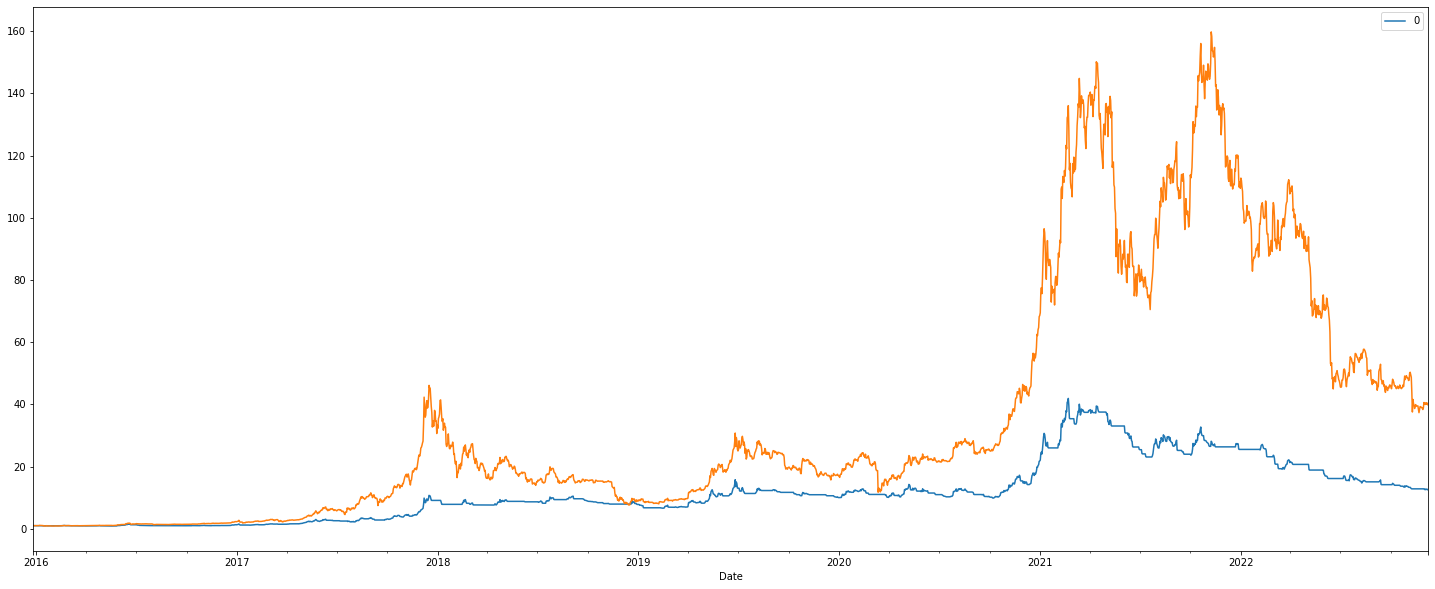

In [16]:
returns.plot(figsize=(25,10))
(data['Close']/data['Close'][0]).plot()